In [9]:
from utils import load_lda_model
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel,LdaModel
pyLDAvis.enable_notebook()

In [2]:
lda = load_lda_model(r"/Users/jamesmoro/Documents/Python/Topic_Modelling/Results/model")
doc_term_matrix = load_lda_model(r"/Users/jamesmoro/Documents/Python/Topic_Modelling/Results/model.id2word")
with open("cleaned_docs.pkl", 'rb') as f:
    docs = pickle.load(f)
with open("index_dict.pkl", 'rb') as f:
    index_dict = pickle.load(f)

In [13]:
corpus = [index_dict.doc2bow(doc) for doc in docs]

In [10]:
def evaluate_graph(dictionary: gensim.corpora.Dictionary,
                   corpus: list[list], 
                   texts:list[str], 
                   limit:int):
    """
    Function to investigate the coherance of a various number of topics. 
    
    Arguments:
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts: Raw texts
    limit : limit of topics to investigate
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    STEP = 2
    if 20<= limit <= 50:
        STEP = 5
    if limit > 50:
        STEP = 10
    
    for num_topics in range(2, limit, STEP):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,passes = 20, iterations = 400)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(2, limit, STEP)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

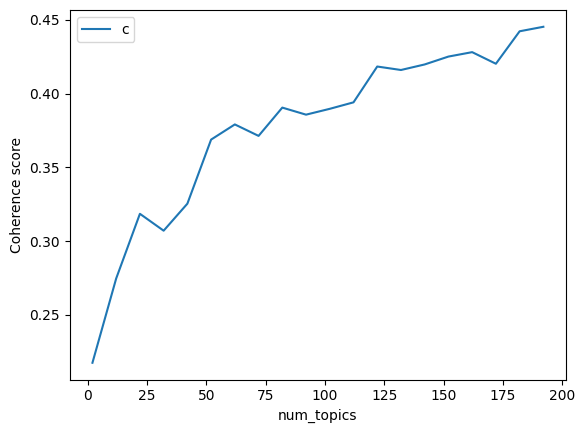

In [11]:
lm_list, c_v = evaluate_graph(dictionary=index_dict, corpus=corpus, texts=docs, limit = 200)

Looks like the graph starts flattening out around 150 topics. 